# Different Support Vector Machine Models for music genre classification

## Abstract

In this project, we propose to compare the different kernels SVM models' performance on **music genres classification**. Before building the model, we implemented **standardization and normalization** on training dataset and testing dataset to do the feature engineering. Then we did gridsearch based on the cross validation methology to choose the best parameters of the SVMs to classify. The best parameters for the **Linear SVM** are C equeals 2, penalty equeals l1, and the best parameters for the **kernel SVM** are kernel equals rbf, gamma equals 0.01, C equals 25. As reults showed in the experiment, Linear SVM showed **0.65562** accuracy, **0.17025** logloss on testing data from Kaggle. Kernel SVM showed **0.62710** accuracy and **0.20039** logloss on testing data from Kaggle. From the result, we could conclude, Linear SVM showed better result than the RBF-kernel SVM on the music genre classification.


### Key words
music genres classification, standardization, normalization, Linear-SVM, RBF-SVM

## 1. Introduction

**1.0 Background:** 

We are in an area where video and music content expand more every year. The content on youtube grown exponentially every second. So there is a clear trend in computer science for classifying music using Machine Learning for example. The research for music classification is founding from public and private sector since some companies like Spotify based their business plan in the result of their classification.

**1.1 Problem Statement:** 

In our case the problem is not about predicting which music we may like. Instead our problem is to define the type of a song e.g. Rock or International for example. To do so we have some data with label and our problem is to build a model in order to classify which is the corresponding type of the test data. 

**1.2 Motivation:** 

After some time we decided to solve the problem using Support Vector Machine. The main reasons were support vector machine can solve multiclass classification problems with any number of classes. Support vector machine works with high dimensional data in both sparse and dense format. Finally there is no need for expensive computing resources.

**1.3 Struction:** 

For the project structure, we did data analysis to go deep into the data to see the class distribution and dimensionality. Then we did feature engineering and using GridSearch to do two SVM models selection, and finally compared their performance.

**1.4 Pre-knowledge:** 

Support Vector Machine is an algorithm where we can fold the space to find the hyperplane to classify the data efficiently.

**1.5 What we want to learn:** 

We want to learn how to do feature engineering, how to use Support Vector Machine and how to select parameters of the models.

**1.6 What question is being addressed?** 

We want to know the different performance from diffent kernels SVM.

**1.7 Why is this task important?** 

Choosing the suitable parameters of SVM for the specific problem is always importance, we want to know which SVM shows better performance on the music genre classification.

## 2. Data analysis

In Data analysis, we will analyze the class distribution, the dimensionality and other statistics, do give a basic idea about how our data looks like.

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import itertools
import statistics,math

In [11]:
# Load the data and cleanup
train_data = pd.read_csv('train_data.csv',header = None)
train_label = pd.read_csv('train_labels.csv',header=None)
#train_label = np.ravel(train_label)
test_data = pd.read_csv("test_data.csv",header=None)
print('Shape of the train data=',train_data.shape)
print('Number of elements in the data=', train_data.shape[0])
print('Number of features in the data=',train_data.shape[1])

Shape of the train data= (4363, 264)
Number of elements in the data= 4363
Number of features in the data= 264


We concatenate the both pandas DataFrame together to be one. The idea behind the concatenation is to extract later the lines according their label.

In [12]:
train_label.columns = ['label']
train = pd.concat([train_data,train_label],axis=1)

Here, we create 10 new pandas DataFrame. Each dataframe contains the lines of their labels.

In [13]:
Pop_rock = train.loc[train.label == 1]
Electronic = train.loc[train.label == 2]
Rap = train.loc[train.label == 3]
Jazz = train.loc[train.label == 4]
Latin = train.loc[train.label == 5]
RnB = train.loc[train.label == 6]
International = train.loc[train.label == 7]
Country = train.loc[train.label == 8]
Reggage = train.loc[train.label == 9]
Blues = train.loc[train.label == 10]

Now, we have 10 dataframes, we are taking the number of elements in each of them to have a clear idea about the distribution of the elements between the 10 classes.

In [14]:
Pop_rock_value = np.array([Pop_rock.shape[0]])
Electronic_value = np.array([Electronic.shape[0]])
Rap_value = np.array([Rap.shape[0]])
Jazz_value = np.array([Jazz.shape[0]])
Latin_value = np.array([Latin.shape[0]])
RnB_value = np.array([RnB.shape[0]])
International_value = np.array([International.shape[0]])
Country_value = np.array([Country.shape[0]])
Reggage_value = np.array([Reggage.shape[0]])
Blues_value = np.array([Blues.shape[0]])

In [15]:
Distribution = pd.DataFrame({'Pop Rock': Pop_rock_value, 'Electronic': Electronic_value, 'Rap': Rap_value, 'Jazz': Jazz_value, 'Latin': Latin_value, 'RnB': RnB_value, 'International': International_value, 'Country': Country_value, 'Reggage': Reggage_value, 'Blues': Blues_value}, index = ['Distribution'])

We just stored the 10 values, we can see from the result bellow that the class label "1" also known as Pop Rock contains almost of the element with 2178 elements, after come Electronic and Rap. Finally the smalest number is for the class Blues with only 86 elements. 

##  Visualization

In [16]:
Distribution

,Blues,Country,Electronic,International,Jazz,Latin,Pop Rock,Rap,Reggage,RnB
Distribution,86,195,618,141,253,214,2178,326,92,260


To have a better idea, we can see from the piechart bellow the % of distribution. As we could have expected from the above result Pop Rock reprents around 50% of the distribution. So it's clear that the train data is unbalanced. In the second position we have Electronic with 14.2% and in the last position we have Blues with only 2%.

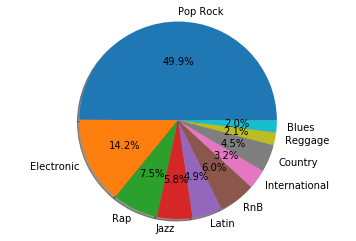

In [17]:
plt.pie([Pop_rock_value, Electronic_value, Rap_value, Jazz_value, Latin_value, RnB_value, International_value, Country_value, Reggage_value, Blues_value], labels=['Pop Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggage', 'Blues'], 
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.show()

Bellow a histogram of the distribution. Like we already discuss before there is no suprise that Pop Rock is the highest bar with more than 2000 elements.

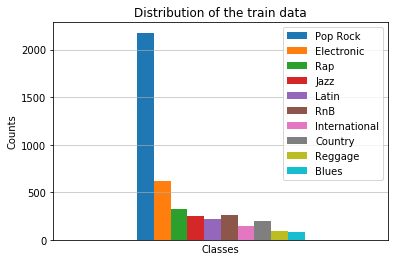

In [63]:
Distribution.plot(kind='bar')
plt.title('Distribution of the train data')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.grid(axis='y', alpha=0.75)

Since Pop Rock is the highest number of elements we want to have a better look of the distribution of the features inside the class. 

In [20]:
Pop_rock_pd = pd.DataFrame(Pop_rock)

The code bellow is reducing, in order to get a better visualization and only for visualization purpose, the number of features to 13. As it was mention in the guideline, the train data as been construct from the Rhythm, Chroma and MFCC. After the same statictics was present multiple times for the same element. For example the first 24 columns represents the mean of the same song. So for this example we keep the mean of those 24 columns. The same logic has been adapt for each statistic provided in the train data file.

In [23]:
mean_rhythm = []
median_rhythm = []
var_rhythm = []
min_rhythm = []
max_rhythm = []

mean_chroma = []
sd_chroma = []
min_chroma = []
max_chroma = []

mean_mfcc = []
sd_mfcc = []
min_mfcc = []
max_mfcc = []

for i in range(0, Pop_rock_pd.shape[0]):
    mean_rhythm.append(np.mean(Pop_rock_pd.iloc[i,0:23]))
    median_rhythm.append(statistics.median(Pop_rock_pd.iloc[i,24:47]))
    var_rhythm.append(np.mean(Pop_rock_pd.iloc[i,48:71]))
    min_rhythm.append(min(Pop_rock_pd.iloc[i,120:142]))
    max_rhythm.append(max(Pop_rock_pd.iloc[i,144:166]))
    mean_chroma.append(np.mean(Pop_rock_pd.iloc[i,168:180]))
    sd_chroma.append(np.mean(Pop_rock_pd.iloc[i,180:192]))
    min_chroma.append(min(Pop_rock_pd.iloc[i,192:204]))
    max_chroma.append(max(Pop_rock_pd.iloc[i,204:216]))    
    mean_mfcc.append(np.mean(Pop_rock_pd.iloc[i,220:228]))    
    sd_mfcc.append(np.mean(Pop_rock_pd.iloc[i,228:240]))    
    min_mfcc.append(min(Pop_rock_pd.iloc[i,240:252]))    
    max_mfcc.append(max(Pop_rock_pd.iloc[i,252:264]))

For the Rythm the variance was given instead of the SD so we apply the square in order to get the the SD for all the three different pattern.

In [24]:
sd_rhythm = []
counter = []

for i in range(0,len(var_rhythm)):
    counter.append(max(0,var_rhythm[i]))
    sd_rhythm.append(math.sqrt(counter[i]))

At first the idea was to boxplot all the elements of the same pattern together but as we can expect the range of values between different statiscical features can be very different which make the visualization very difficult, example bellow.

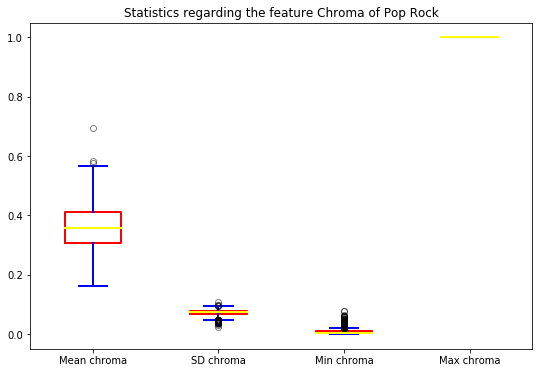

In [25]:
data_to_plot = [mean_chroma, sd_chroma, min_chroma, max_chroma]
fig = plt.figure(4, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
for box in bp['boxes']:
    box.set( color='red', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='blue', linewidth=2)
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='green', alpha=0.5)
ax.set_xticklabels(['Mean chroma', 'SD chroma', 'Min chroma', 'Max chroma'])
ax.set_title('Statistics regarding the feature Chroma of Pop Rock')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

To make the visualization easier, we can see bellow the 4 statical values of the Chroma pattern in the same window but 4 differents boxplot for each of the value having his own range. 
We are going to explain what we can extract fom the visualization and the same reasoning can be applied in all the boxplot bellow.
So in a boxplot, you have first the range of the scale in the left hand side in that case. This range give us the range of the values of the elements. If we take for example the boxplot called Min Chroma the values are include between 0 and 0.08. After you have the boxplot itself. The extremities of the boxplot represent the minimun and the maximun respectively the bottom and the top. Afer you have the box this time representing the Quartile 1 and the Quartile 3. Finally you have the line inside the the box representing the median or Quartile 2. The boxplot is very informative to understand how the values are distrbuted inside a column. Also, in a boxplot you can see outliers for example in the boxplot called Mean Chroma you have few outliers above the maximun, in SD Chroma you have some outliers above and bellow the extremities and in Min Chroma you have many outliers above the maximun consider to make the boxplot. Here a outliers is define if the values is greater or smaller than 1.5* IQR where IQR represent the difference between Q3 and Q1. 
A box plot is very informative about the range of the elements as we said before but also to get a better visualization of how the elements are balanced for example Mean Chroma the data is well balanced but for Min Chroma we can see that Min Q1 and Q@ are very close so 50% of the values are evry close to each other and Q2 to max is more spread.
The last conclusion we can draw from the Croma pattern is that for the Max all the values are equal to 1 since we only line which means that Min = Q1 = Q2 = Q3 = Max so Max Chroma is not really informative.

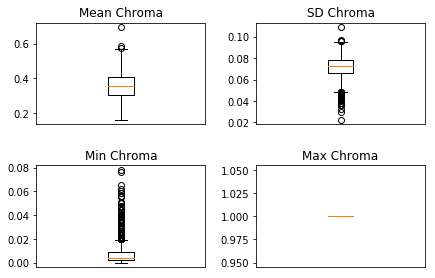

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0,0].boxplot(mean_chroma)
axs[0,0].set_title('Mean Chroma')
axs[0,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0,1].boxplot(sd_chroma)
axs[0,1].set_title('SD Chroma')
axs[0,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,0].boxplot(min_chroma)
axs[1,0].set_title('Min Chroma')
axs[1,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,1].boxplot(max_chroma)
axs[1,1].set_title('Max Chroma')
axs[1,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

This time we will be fatser on the analysis since we got into more details before. The mean for the MFCC pattern is around 0 which outliers. The SD contains values between 0 and 1.5 according to the box but the values can go up to more than 3. The Min is going from -0.5 to -0.1. Finally Tha Max is very well balanced between 0.1 to 0.5.

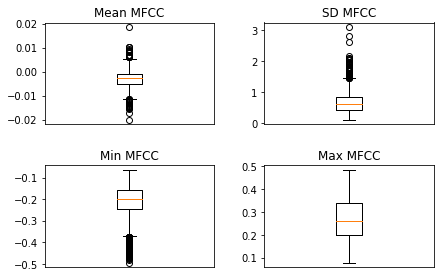

In [27]:
fig, axs = plt.subplots(2, 2)
axs[0,0].boxplot(mean_mfcc)
axs[0,0].set_title('Mean MFCC')
axs[0,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0,1].boxplot(sd_mfcc)
axs[0,1].set_title('SD MFCC')
axs[0,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,0].boxplot(min_mfcc)
axs[1,0].set_title('Min MFCC')
axs[1,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,1].boxplot(max_mfcc)
axs[1,1].set_title('Max MFCC')
axs[1,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

For the rythm, this time the values are bigger than before from 0 to 7000. To really grasp the information we are going to see each boxplot individually or with a boxplot who shared the same range(i.e Mean and Median).
To recall we are visualizing the values for the Pop Rock class. We can see that the mean is distributed between around 100 and 6500. This is a wide range and as we can expect the Median shared almost the same range. In the case of the Median we also got some outliers. The median of the mean is higher than the median of the median.

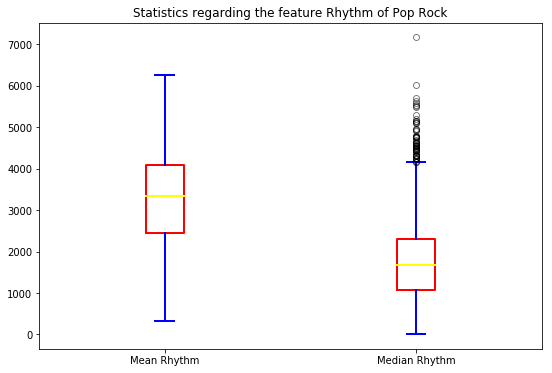

In [28]:
data_to_plot = [mean_rhythm, median_rhythm]
fig = plt.figure(4, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
for box in bp['boxes']:
    box.set( color='red', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='blue', linewidth=2)
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='green', alpha=0.5)
ax.set_xticklabels(['Mean Rhythm', 'Median Rhythm'])
ax.set_title('Statistics regarding the feature Rhythm of Pop Rock')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

The min for the rythm as most of his values between 0 and 200 since the Q2 is very close to the minmun in the boxplot. The range between Q3 and max is higher with some outliers.

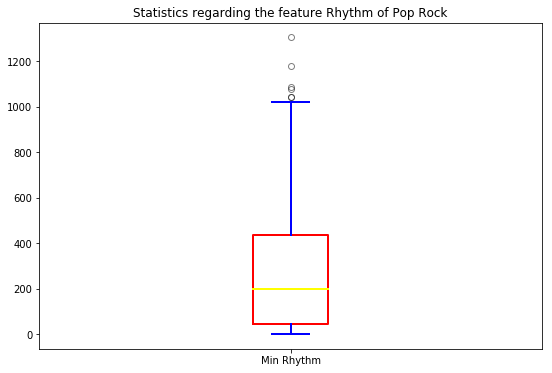

In [29]:
data_to_plot = [min_rhythm]
fig = plt.figure(4, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
for box in bp['boxes']:
    box.set( color='red', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='blue', linewidth=2)
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='green', alpha=0.5)
ax.set_xticklabels(['Min Rhythm'])
ax.set_title('Statistics regarding the feature Rhythm of Pop Rock')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

To conclude the part about the boxplot. The max and sd is well distributed for their respective range with outliers in both side.

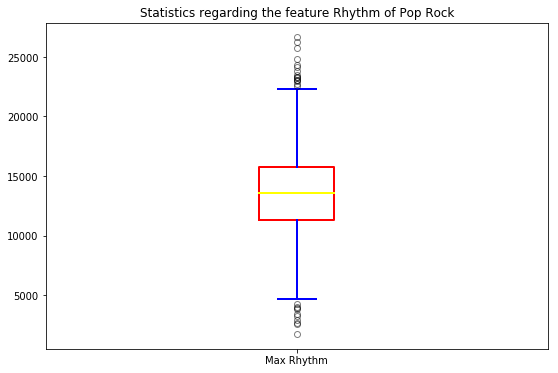

In [30]:
data_to_plot = [max_rhythm]
fig = plt.figure(4, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
for box in bp['boxes']:
    box.set( color='red', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='blue', linewidth=2)
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='green', alpha=0.5)
ax.set_xticklabels(['Max Rhythm'])
ax.set_title('Statistics regarding the feature Rhythm of Pop Rock')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

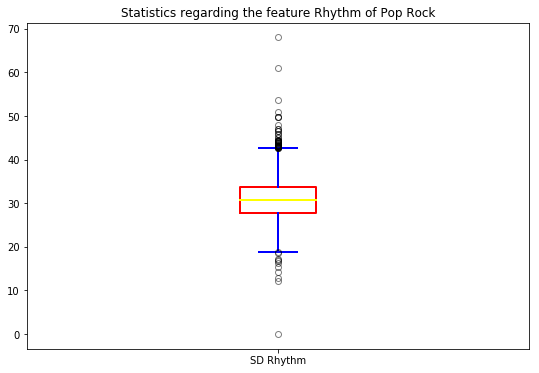

In [31]:
data_to_plot = [sd_rhythm]
fig = plt.figure(4, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
for box in bp['boxes']:
    box.set( color='red', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='blue', linewidth=2)
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='green', alpha=0.5)
ax.set_xticklabels(['SD Rhythm'])
ax.set_title('Statistics regarding the feature Rhythm of Pop Rock')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

To conclude the Data Analysis part. We have unbalanced data among the classes. The class Pop rock represent almost as much as the nine other classes together. Also, we have visualized the statistical values for Pop Rock to get an insight but we will not this reduction for the folowing.

## 3. Methods and experiments

In this project, we compared two different models, one is Linear SVM and another one is kernel SVM. We tried to use standardization and normalization to do feature engineering.

* **Step1**: Delete column 204-220 and do standardization and normalization on the training data.
* **Step2**: Build Linear SVM, set tuned parameters and use GridSearch to find the local optimized parameters. During the processing, we use cross CV to evaluate the methodology and then get the parameters.
* **Step3**: Build Kernel SVM and use GridSearch to find the local optimezed parameters. During the processing, we use cross CV to evaluate the methodology and get the parameters.
* **Step4**: Use the best parameters and train the model
* **Step5**: Do the same normalization and standardization and then use the trained model to predict the test data.

## 3.0 Feature Engineering

In [4]:
# clean the column 216-220
train_data_f = pd.concat([train_data.iloc[:,:216],train_data.iloc[:,220:]],axis = 1)
test_data_f = pd.concat([test_data.iloc[:,:216],test_data.iloc[:,220:]],axis = 1)

# standerize and normalize data
scaler = StandardScaler()

scaler.fit(train_data_f)
train_data_f = scaler.transform(train_data_f)
train_data_f = normalize(train_data_f)

#scaler.fit(test_data_f)
test_data_f = scaler.transform(test_data_f)
test_data_f = normalize(test_data_f)

## 3.1 Linear SVM

### What is Linear SVM
Linear SVM is a fast machine learning (data mining) algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear support vector machine. LinearSVM is a linearly scalable routine meaning that it creates an SVM model in a CPU time which scales linearly with the size of the training data set. 

### Why is Linear SVM
* Efficiency in dealing with extra large data sets

* Solution of multiclass classification problems with any number of classes (We have 10 classes here)

* Working with high dimensional data (thousands of features, attributes) in both sparse and dense format(We have 264 features here)

* No need for expensive computing resources (personal computer is a standard platform)

### How we evaluate the model
We use cross validation to evaluate the model and minimize squared hinge. And based on the evaluation, choosing the best parameters for Linear SVM.

In [111]:
# GridSearch for kernel SVM, it takes a long time, no need to run this.
def LinearSVM_CV(x,y,C_range,penalty_range):
    scores = ['precision','recall']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        param_grid = dict(C = C_range,penalty = penalty_range)
        SVM = LinearSVC(C=1,penalty="l1",dual = False,tol = 1e-4)
        grid = GridSearchCV(SVM,param_grid,cv=5)
        grid.fit(x,y)
        
        print("Best parameters set found on development set:")
        print()
        print(grid.best_estimator_)
        print()
        print("Grid scores on development set:")
        print()
        means = grid.cv_results_['mean_test_score']
        stds = grid.cv_results_['std_test_score']
        for mean,std,params in zip(means,stds,grid.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                 % (mean,std*2,params))
        cv_result = pd.DataFrame.from_dict(grid.cv_results_)
    
    bclf = grid.best_estimator_
    return bclf  

In [ ]:
# Don't need to run this, it takes a long time to run. This will return the best parameters to do the classification.
C_range = range(1,11,1)
penalty_range = ['l1','l2']
bclf = LinearSVM_CV(train_data,train_label,C_range,penalty_range)

In [15]:
# Build Linear SVM with parameters C=3, penalty = "l1", this is the best parameters given by Linear SVM
Linear_svm = LinearSVC(C=3, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
Linear_svm.fit(train_data_f,train_label)

In [5]:
# Build Linear SVM for log loss, with parameters C = 2, penalty = "l1", this is the best parameters given by Linear SVM
Linear_feature_svm = SVC(kernel="linear",C=2,probability=True)
Linear_feature_svm.fit(train_data_f,train_label)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Predict the test data
y_test_pred = my_svm_feature.predict(test_data)
y_pred_labels = pd.DataFrame(y_test_pred)
y_pred_labels.index = range(1,6545)
y_pred_labels.columns = ["Sample_label"]
y_pred_labels.index.name = 'Sample_id'

## 3.2 Kernel SVM

### What is Kernel SVM
Compared with Linear SVM, the only difference is the kernel we use. We will use other kernel functions which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. 

### Why is kernel SVM
* Normally for the high dimensional data, kernels could better describe and give a quicker computation.

* Efficiency in dealing with extra large data sets

* Solution of multiclass classification problems with any number of classes (We have 10 classes here)

* No need for expensive computing resources (personal computer is a standard platform)

### How we evaluate the model
We use cross validation to evaluate the model and minimize the squred hinge. And based on the evaluation, choosing the best parameters for Kernel SVM.


In [157]:
# GridSearch for kernel SVM, it takes a long time, no need to run this.
def KernelSVM_CV(x,y,parameters):
    print("# Tuning hyper-parameters for precision")
    print()
    SVM = SVC(C=1,class_weight="balanced")
    grid = GridSearchCV(SVM,parameters,cv=5)
    grid.fit(x,y)

    print("Best parameters set found on development set:")
    print()
    print(grid.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
             % (mean,std*2,params))
    cv_result = pd.DataFrame.from_dict(grid.cv_results_)
    print(cv_result) 

In [ ]:
# This will return the best parameter chosen by the Grid Search, no need to run, it takes a long time.
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]
bclf2 = KernelSVM_CV(train_data,train_label,tuned_parameters)

In [35]:
# This is the best parameters from the kernel SVM
Kernel_svm = SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Kernel_svm.fit(train_data_f,train_label)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# This is the best parameters from the kernel SVM for the log loss
Kernel_log_svm  = SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True,random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Kernel_log_svm.fit(train_data_f,train_label)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# Predict test data classes
y_test_pred = Kernel_svm.predict(test_data_f)
y_pred_labels = pd.DataFrame(y_test_pred)
y_pred_labels.index = range(1,6545)
y_pred_labels.columns = ["Sample_label"]
y_pred_labels.index.name = 'Sample_id'
y_pred_labels.to_csv("C25_gamma.001_feature_kernel_svm.csv")

## 3.3 Logistic Regression

In [ ]:
def Logistic_CV(x,y,parameters):
    print("# Tuning hyper-parameters for score")
    print()
    LR = LogisticRegression(C=1,penalty="l1",dual = False,tol = 1e-4)
    grid = GridSearchCV(LR,parameters,cv=5)
    grid.fit(x,y)

    print("Best parameters set found on development set:")
    print()
    print(grid.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
             % (mean,std*2,params))
    cv_result = pd.DataFrame.from_dict(grid.cv_results_)
    print(cv_result)
    bclf = grid.best_estimator_
    return bclf  

In [ ]:
parameters = [{'C':range(1,11,1),
              'penalty':['l1','l2']}]
train_label = np.ravel(train_label)
bclf = Logistic_CV(train_data_f,train_label,tuned_parameters)

In [ ]:
# This is the best parameters from the kernel LR
model = LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

model.fit(train_data_f,train_label)

## 4. Results

### Accuracy and Log Loss for Linear & Kernel SVM

In [36]:
print("The Linear SVM accuracy is :\n",Linear_svm.score(train_data_f,train_label))
print("The Kernel SVM accuarcy is :\n ",Kernel_svm.score(train_data_f,train_label))

The Linear SVM accuracy is :
 0.7256474902589961
The Kernel SVM accuarcy is :
  0.6587210634884254


*- Linear SVM's accuracy on training dataset is 72.56% *

*- Kernel SVM's accuracy on training dataset is 65.87% *

**conclusion:** The accuracy on training dataset is always higher than accuracy on test dataset. Because it has already fitten really well on training dataset.

In [8]:
print("Log loss for the Linear SVM is: \n",log_loss(train_label,Linear_feature_svm.predict_proba(train_data_f)))
print("Log loss for the Kernel SVM is: \n",log_loss(train_label,Kernel_log_svm.predict_proba(train_data_f)))

Log loss for the Linear SVM is: 
 0.08643949477934929
Log loss for the Kernel SVM is: 
 0.09232480052559927


*- Linear SVM's log loss on training dataset is 0.8477 *

*- Kernel SVM's log loss on training dataset is 0.9227 *

**conclusion:** The logloss on training dataset is always lower than logloss on test dataset. Because it has already fitten really well on training dataset. 

### Confusion Matrix

In [117]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

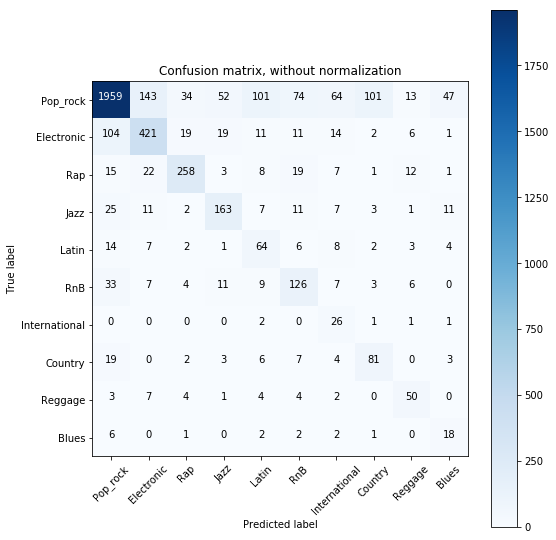

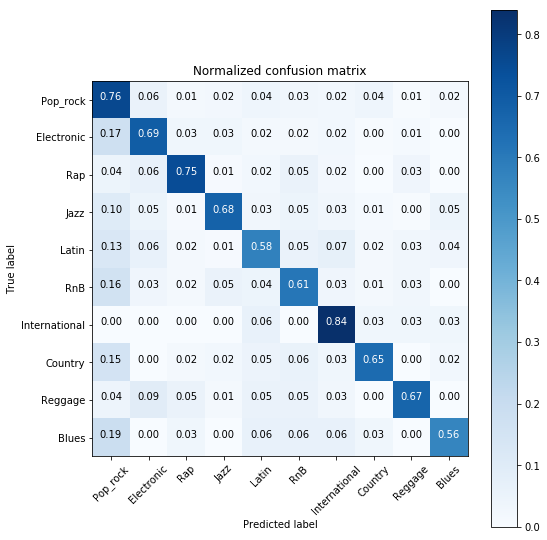

In [118]:
class_names = ["Pop_rock","Electronic","Rap","Jazz","Latin","RnB","International","Country","Reggage","Blues"]
## confusion matrix for the training data
Linear_svm_matrix = confusion_matrix(Linear_svm.predict(train_data_f),train_label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(Linear_svm_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(Linear_svm_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#print("The confusion matrix of Linear SVM for training data is: \n",confusion_matrix(Linear_svm.predict(train_data_f),train_label))

The confusion matrix give us another information---recall, the percentage of one classname you classify correctly. Then we can see from the confusion matrix:

* For pop_rock, the recall is 76%
* For Electronic, the recall is 69%
* For Rap, the recall is 75%
* For Jazz, the recall is 68%
* For Latin, the recall is 58%
* For RnB, the recall is 61%
* For International, the recall is 84%
* For Country, the recall is 65%
* For Reggage, the recall is 67%
* For Blue, the recall is %56

We can conclude our linear SVM could classify the international music best, 84% of the international music has been classified correctly.
Our linear SVM could classify Blue music worst, only 56% of Blue music has been classified correctly.

## 5. Conclusions

***- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets *:**

From the results above, we should find that the higher accuracy strategy always give us lower logloss. For example,
* Linear SVM: Accuracy on training dataset is 72.5647%, the log loss on training dataset is 0.0864
* Kernel SVM: Accuracy on training dataset is 65.8721%, the log loss on training dataset is 0.0923

This makes sense, because if you have more wrong classification, then your accuracy will be lower, and your logloss will be higher. And for unbalanced data, since our data is unbalanced, class 1 dominates most of the data, if we could predict correctly most of the class 1, we could get a high accuracy and a low log loss.

***- How the results relate to the literature *:**

Literature told us the kernels you choose for the SVM is really tricky, and is dataset dependent. And it's true, because at first we were thinking of kernel SVM should perform better than Linear SVM, but the results showed us the Linear one is better, we always need to try the different kernels on the dataset, not just based on the experience.

***- Suggestions for future research/improvement*:**

Actually we also did Linear SVM on training dataset without feature engineering, we got a worse accuracy than the strategy doing the feature engineering. We think in the future, we could spend more time on the feature engineering, like reducing the dimension of the data using PCA or we sample from the unbalanced data to make the data balanced.

***- Did the study answer your questions? ***

Yes. The study gave us the basic idea about how to use the SVM to do classification and how to choose the parameters and how to evaluate the model.

## 6. References

Kecman V. () Support Vector Machines – An Introduction. In: Wang L. (eds) Support Vector Machines: Theory and Applications. Studies in Fuzziness and Soft Computing, vol 177. Springer, Berlin, Heidelberg.

On the algorithmic implementation of multiclass kernel-based vector machines J. Mach. Learn. Res., Vol. 2 (2002), pp. 265-292 by Koby Crammer, Yoram Singer